In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('SOCR-HeightWeight.csv')

In [4]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
df.drop('Index',axis=1,inplace=True)

In [6]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Text(0, 0.5, 'Height(Inches)')

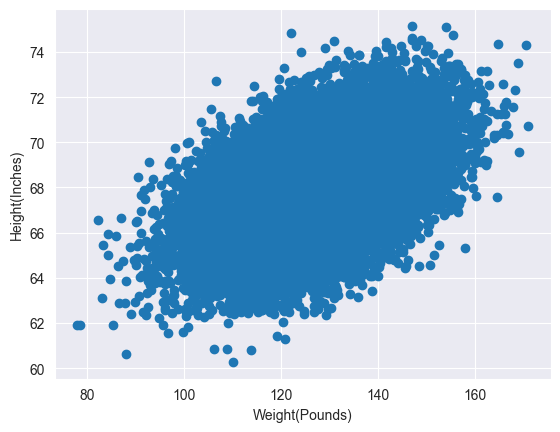

In [7]:
plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel('Weight(Pounds)')
plt.ylabel('Height(Inches)')

In [8]:
df.rename(columns={'Weight(Pounds)': 'Weight'}, inplace=True)
df.rename(columns={'Height(Inches)': 'Height'}, inplace=True)


In [9]:
df.columns

Index(['Height', 'Weight'], dtype='object')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  25000 non-null  float64
 1   Weight  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [12]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [13]:
df.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [14]:
# divide our dataset into independent and dependent features
X=df[['Weight']] # independent feature
y=df['Height'] # dependent feature

In [15]:
X.shape

(25000, 1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [17]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

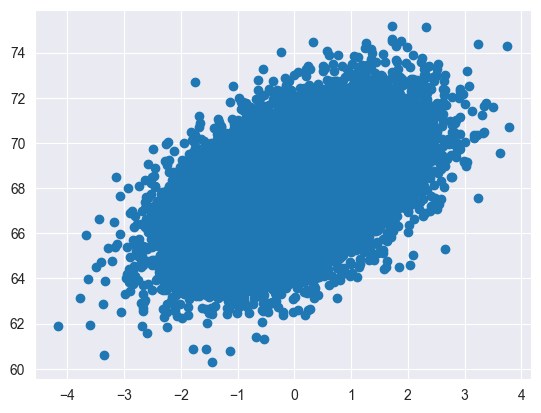

In [18]:
plt.scatter(X_train_scaled,y_train)

In [19]:
# Train the Simple Linear Regression model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
print('The slope or coefficient of weight is :', lin_reg.coef_)
print('The intercept:', lin_reg.intercept_)

The slope or coefficient of weight is : [0.95303899]
The intercept: 67.99994474805969


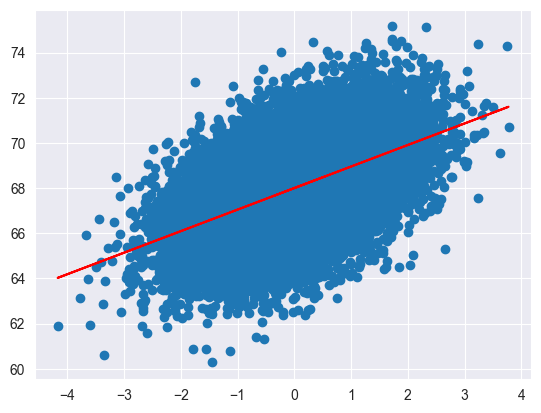

In [21]:
# Prediction of train data
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,lin_reg.predict(X_train_scaled),'r')

In [22]:
# Prediction of test data
y_pred=lin_reg.predict(X_test_scaled)

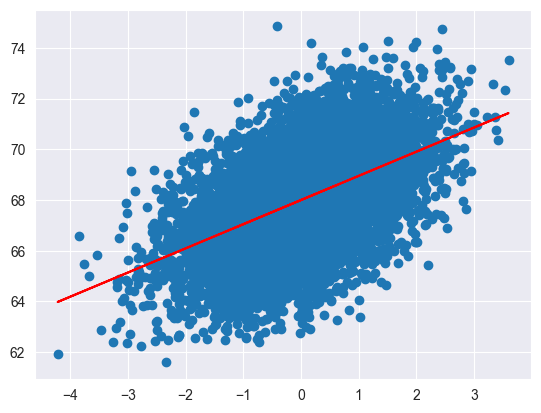

In [23]:
plt.scatter(X_test_scaled,y_test)
plt.plot(X_test_scaled,lin_reg.predict(X_test_scaled),'r')

## Performance metrics

In [24]:
# MSE, MAE, RMSE
# R squared and adjusted R squared
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.7172557588214987
1.3128577861398483
1.6484100699830424


In [25]:
score=r2_score(y_test,y_pred)
print(score)

0.254243510768025


In [26]:
# Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.2541530941228708

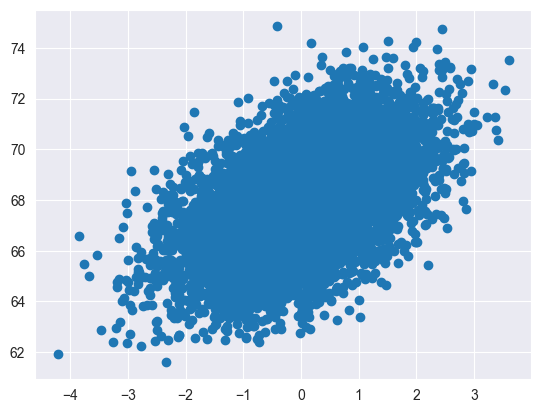

In [27]:
plt.scatter(X_test_scaled,y_test)

In [28]:
residuals=y_test-y_pred
residuals

6868    -0.168710
24016    1.134281
9668    -1.073543
13640    1.068286
14018    3.214980
           ...   
10802    1.281021
7160     1.036424
2499    -0.325217
12899   -0.812589
18149    1.816371
Name: Height, Length: 8250, dtype: float64

C:\Users\LENOVO_PC\AppData\Local\Temp\ipykernel_5108\2322259484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

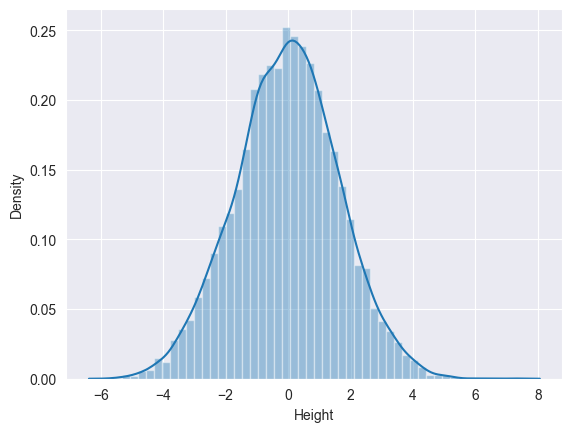

In [29]:
sns.distplot(residuals,kde=True)